## Finding the best forwards of 2016 using FIFA dataset

https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset/code

### Importing the data

In [1]:
import pandas as pd

data = pd.read_csv('players_16.csv')
print(data)

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2           9014  https://sofifa.com/player/9014/arjen-robben/16...   
3         167495  https://sofifa.com/player/167495/manuel-neuer/...   
4         176580  https://sofifa.com/player/176580/luis-suarez/1...   
...          ...                                                ...   
15618     227910  https://sofifa.com/player/227910/liam-gooch/16...   
15619     228582  https://sofifa.com/player/228582/sam-sargeant/...   
15620     229429  https://sofifa.com/player/229429/kai-mckenzie-...   
15621     229852  https://sofifa.com/player/229852/corey-shephar...   
15622     230566  https://sofifa.com/player/230566/lewis-moore/1...   

              short_name                            long_name  \
0               L. Messi       Lionel Andrés Messi Cuccittini   
1      Cristiano 

C:\Users\SRINI\AppData\Local\Temp\ipykernel_22784\59309690.py:3: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('players_16.csv')


In [2]:
print(data.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


### Retaining columns which are essential for the analysis

In [3]:
data = data[['short_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'player_traits' ,'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling' , 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties']]
print(data.head())

          short_name player_positions  overall  potential    value_eur  \
0           L. Messi           RW, CF       94         95  111000000.0   
1  Cristiano Ronaldo           LW, LM       93         93   85500000.0   
2          A. Robben       RM, LM, RW       90         90   56000000.0   
3           M. Neuer               GK       90         90   58000000.0   
4          L. Suárez               ST       90         90   69000000.0   

   wage_eur  age  height_cm  weight_kg          club_name  ...  \
0  550000.0   28        170         72       FC Barcelona  ...   
1  475000.0   30        185         80     Real Madrid CF  ...   
2  250000.0   31        180         80  FC Bayern München  ...   
3  250000.0   29        193         92  FC Bayern München  ...   
4  300000.0   28        182         85       FC Barcelona  ...   

  power_shot_power power_jumping power_stamina  power_strength  \
0               80            68            76              59   
1               94        

### Comparing players' wages and value with their overall and potential ratings

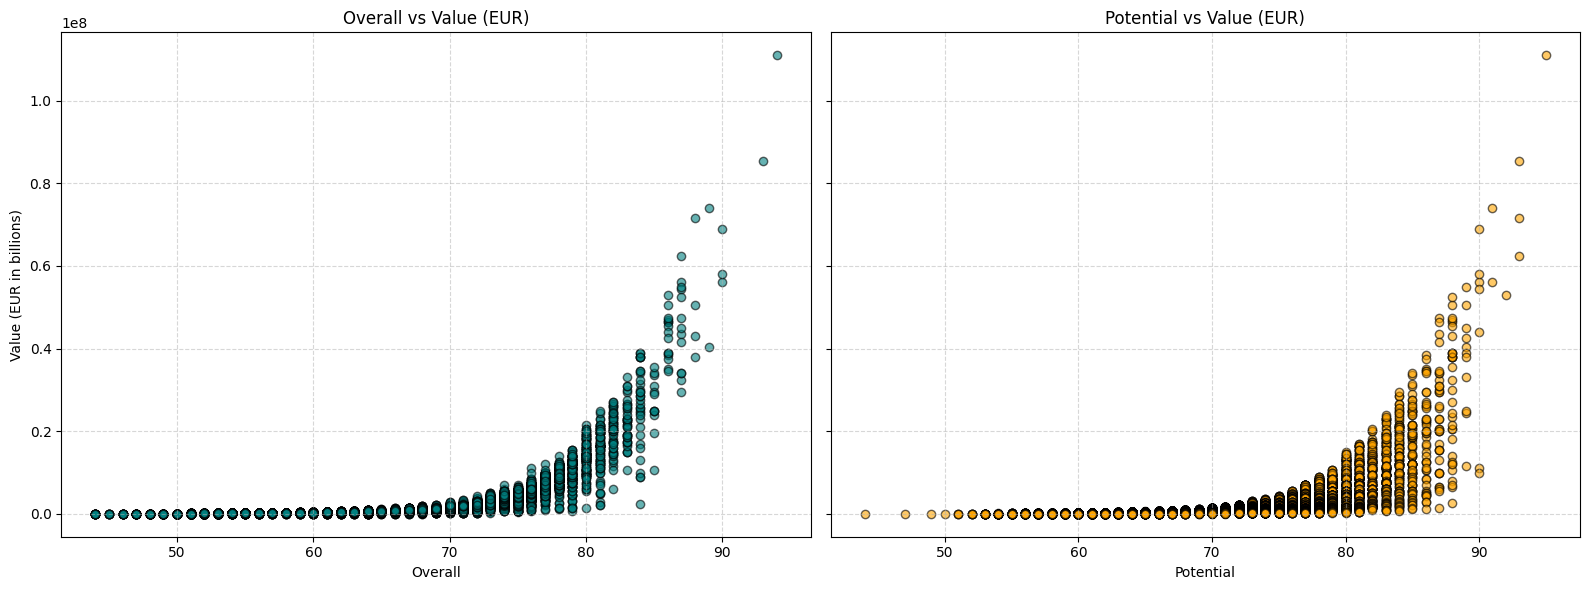

In [4]:
import matplotlib.pyplot as plt
# Setting up the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 'overall' vs 'value_eur'
axs[0].scatter(data['overall'], data['value_eur'], alpha=0.6, color='teal', edgecolor='k')
axs[0].set_title('Overall vs Value (EUR)')
axs[0].set_xlabel('Overall')
axs[0].set_ylabel('Value (EUR in billions)')
axs[0].grid(True, linestyle='--', alpha=0.5)

# 'potential' vs 'value_eur'
axs[1].scatter(data['potential'], data['value_eur'], alpha=0.6, color='orange', edgecolor='k')
axs[1].set_title('Potential vs Value (EUR)')
axs[1].set_xlabel('Potential')
axs[1].grid(True, linestyle='--', alpha=0.5)

# plot
plt.tight_layout()
plt.show()

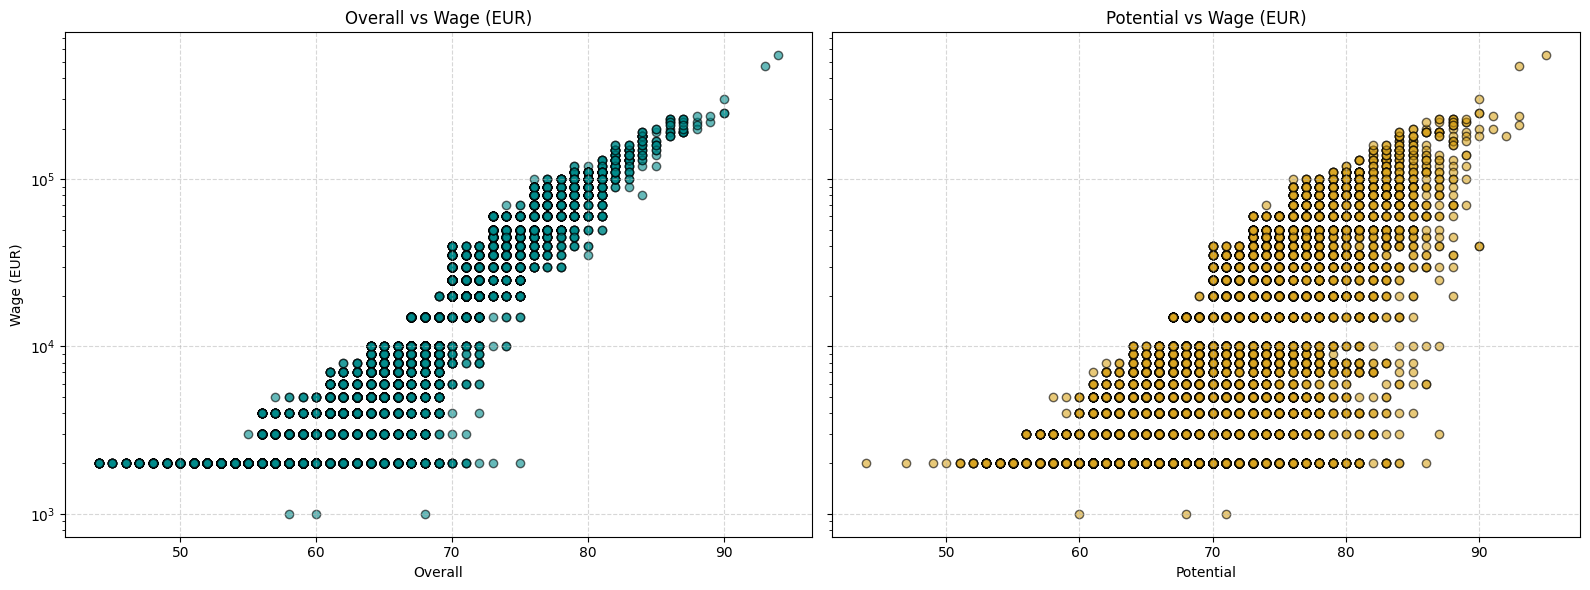

In [5]:
import matplotlib.pyplot as plt

# Setting up the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 'overall' vs 'wage_eur'
axs[0].scatter(data['overall'], data['wage_eur'], alpha=0.6, color='darkcyan', edgecolor='k')
axs[0].set_title('Overall vs Wage (EUR)')
axs[0].set_xlabel('Overall')
axs[0].set_ylabel('Wage (EUR)')
axs[0].grid(True, linestyle='--', alpha=0.5)

# 'potential' vs 'wage_eur'
axs[1].scatter(data['potential'], data['wage_eur'], alpha=0.6, color='goldenrod', edgecolor='k')
axs[1].set_title('Potential vs Wage (EUR)')
axs[1].set_xlabel('Potential')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Using logarithmic scale for better comparison
axs[0].set_yscale('log')
axs[1].set_yscale('log')

# plot
plt.tight_layout()
plt.show()

### Filtering players who play in forward positions like LW, RW, ST and CF

In [6]:
# filtering by positions
positions = ["CF", "LW", "RW", "ST"]
filtered_data = data[data['player_positions'].str.contains('|'.join(positions))]

# filtered records
print(filtered_data)

              short_name player_positions  overall  potential    value_eur  \
0               L. Messi           RW, CF       94         95  111000000.0   
1      Cristiano Ronaldo           LW, LM       93         93   85500000.0   
2              A. Robben       RM, LM, RW       90         90   56000000.0   
4              L. Suárez               ST       90         90   69000000.0   
5         Z. Ibrahimović               ST       89         89   40500000.0   
...                  ...              ...      ...        ...          ...   
15581       M. Alnajrani               LW       47         56      50000.0   
15593      N. McLaughlin          ST, CAM       46         63      70000.0   
15600          R. Gondoh           ST, LM       46         60      70000.0   
15604       J. Akintunde               ST       45         57      60000.0   
15615         A. O'Kelly              RWB       44         60      60000.0   

       wage_eur  age  height_cm  weight_kg            club_name

In [7]:
filtered_data.shape

(3977, 49)

In [8]:
# Number of rows and columns
num_rows, num_columns = filtered_data.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3977
Number of columns: 49


### Exploring the filtered data

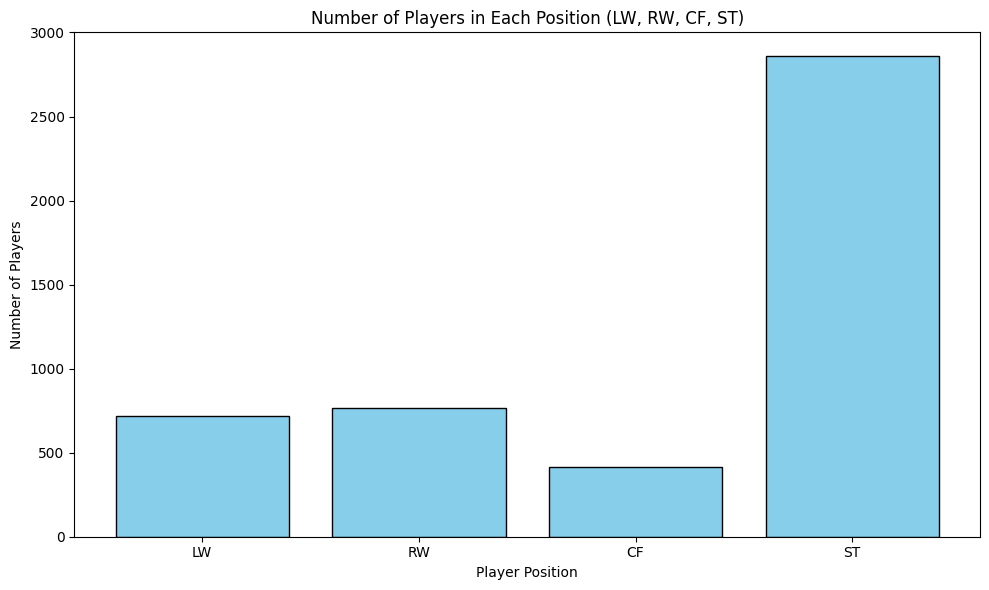

In [9]:
import matplotlib.pyplot as plt

positions_of_interest = ['LW', 'RW', 'CF', 'ST']

# Counts for each position
position_counts = {position: 0 for position in positions_of_interest}

# Count for relevant positions
for positions in data['player_positions']:
    # Splitting the player's positions 
    for position in positions.split(', '):
        if position in positions_of_interest:
            position_counts[position] += 1

# Bar chart for the four positions
plt.figure(figsize=(10, 6))
plt.bar(position_counts.keys(), position_counts.values(), color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Player Position')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Position (LW, RW, CF, ST)')
plt.xticks(rotation=0)

# plot
plt.tight_layout()
plt.show()

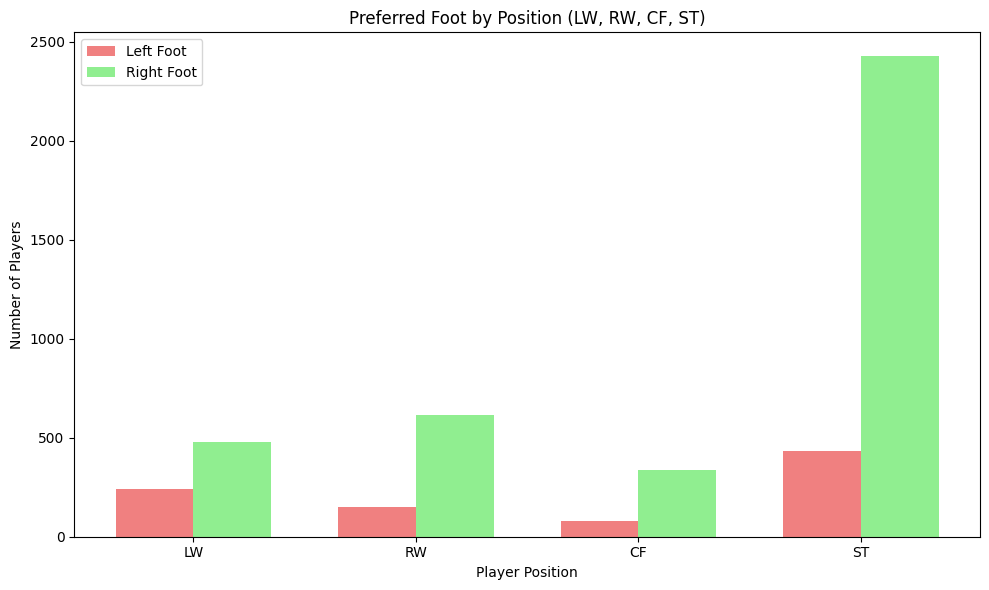

In [10]:
import matplotlib.pyplot as plt

positions_of_interest = ['LW', 'RW', 'CF', 'ST']

# Preferred foot categories
preferred_foot_options = ['Left', 'Right']

# Preferred foot for each position
position_foot_counts = {position: {'Left': 0, 'Right': 0} for position in positions_of_interest}

# Loop through each player's positions and preferred foot
for positions, foot in zip(data['player_positions'], data['preferred_foot']):
    # Split the player's positions (in case they play in multiple positions)
    for position in positions.split(', '):
        if position in positions_of_interest:
            if foot in preferred_foot_options:
                position_foot_counts[position][foot] += 1

# Preferred foot and position
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare the data for plotting
left_counts = [position_foot_counts[position]['Left'] for position in positions_of_interest]
right_counts = [position_foot_counts[position]['Right'] for position in positions_of_interest]
bar_width = 0.35
x = range(len(positions_of_interest))

# bars for left and right foot
ax.bar(x, left_counts, width=bar_width, label='Left Foot', color='lightcoral')
ax.bar([p + bar_width for p in x], right_counts, width=bar_width, label='Right Foot', color='lightgreen')

# labels, title, and legend
ax.set_xlabel('Player Position')
ax.set_ylabel('Number of Players')
ax.set_title('Preferred Foot by Position (LW, RW, CF, ST)')
ax.set_xticks([p + bar_width / 2 for p in x])  # Adjust x-ticks to place between bars
ax.set_xticklabels(positions_of_interest)
ax.legend()

# plot
plt.tight_layout()
plt.show()

### To make the analysis easy, filter players with overall and potential more than 80

In [11]:
# Filtering rows where 'overall' and 'potential' are greater than 80
filtered_data1 = filtered_data[(filtered_data['overall'] > 80) & (filtered_data['potential'] > 80)]
print(filtered_data1)

            short_name player_positions  overall  potential    value_eur  \
0             L. Messi           RW, CF       94         95  111000000.0   
1    Cristiano Ronaldo           LW, LM       93         93   85500000.0   
2            A. Robben       RM, LM, RW       90         90   56000000.0   
4            L. Suárez               ST       90         90   69000000.0   
5       Z. Ibrahimović               ST       89         89   40500000.0   
..                 ...              ...      ...        ...          ...   
237        S. Feghouli           RW, RM       81         85   21500000.0   
246            W. Bony               ST       81         84   21000000.0   
256         L. Insigne          CAM, CF       81         86   23000000.0   
262             Morata               ST       81         88   24500000.0   
264           M. Depay          LW, CAM       81         89   25000000.0   

     wage_eur  age  height_cm  weight_kg            club_name  ...  \
0    550000.0   2

### Keeping the players in the Top 5 leagues and are younger than 36 years old

In [12]:
# Filter rows where the player is in Top 5 leagues and age is less than 36
best_players = filtered_data1[(filtered_data1['league_name'].isin([
    'German 1. Bundesliga', 
    'English Premier League', 
    'Spain Primera Division', 
    'French Ligue 1', 
    'Italian Serie A'
])) & (filtered_data1['age'] < 36)]

pd.set_option('display.max_columns', None) 
best_players

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties
0,L. Messi,"RW, CF",94,95,111000000.0,550000.0,28,170,72,FC Barcelona,Spain Primera Division,Argentina,Left,4,4,Medium/Low,Unique,"Finesse Shot, Speed Dribbler (AI), One Club Pl...",92.0,88.0,86.0,95.0,24.0,62.0,80,93,71,88,85,96,89,90,79,96,95,90,92,92,95,80,68,76,59,88,48,22,90,90,74
1,Cristiano Ronaldo,"LW, LM",93,93,85500000.0,475000.0,30,185,80,Real Madrid CF,Spain Primera Division,Portugal,Right,4,5,High/Low,Unique,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",92.0,93.0,80.0,91.0,33.0,78.0,82,95,86,81,87,93,88,77,72,91,91,93,90,92,62,94,94,87,79,93,62,29,93,81,85
2,A. Robben,"RM, LM, RW",90,90,56000000.0,250000.0,31,180,80,FC Bayern München,German 1. Bundesliga,Netherlands,Left,2,4,High/Low,Normal (170-185),"Diver, Injury Prone, Avoids Using Weaker Foot,...",92.0,86.0,82.0,92.0,32.0,64.0,80,85,51,85,86,93,86,83,74,90,92,92,91,91,91,86,61,76,65,90,47,39,89,84,80
4,L. Suárez,ST,90,90,69000000.0,300000.0,28,182,85,FC Barcelona,Spain Primera Division,Uruguay,Right,4,4,High/Medium,Normal (170-185),"Diver, Beat Offside Trap, Flair, Technical Dri...",83.0,88.0,79.0,87.0,42.0,79.0,77,90,77,82,87,88,86,84,64,91,88,78,86,91,60,88,69,86,76,85,78,41,91,84,85
5,Z. Ibrahimović,ST,89,89,40500000.0,220000.0,33,195,95,Paris Saint-Germain,French Ligue 1,Sweden,Right,4,4,Medium/Low,Normal (185+),"Power Free-Kick, Leadership, Flair, Long Shot ...",73.0,90.0,81.0,85.0,31.0,86.0,76,90,76,84,92,87,80,80,76,90,72,74,86,85,41,93,72,75,93,88,84,20,86,83,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,S. Feghouli,"RW, RM",81,85,21500000.0,110000.0,25,177,75,Valencia CF,Spain Primera Division,Algeria,Right,3,3,High/Medium,Normal (170-185),Speed Dribbler (AI),88.0,74.0,74.0,85.0,32.0,63.0,80,73,60,75,71,87,57,68,69,84,85,90,86,79,80,80,72,78,58,71,55,31,80,76,62
246,W. Bony,ST,81,84,21000000.0,120000.0,26,182,91,Manchester City,English Premier League,Côte d'Ivoire,Right,4,3,Medium/Low,Stocky (170-185),"Injury Free, Long Shot Taker (AI), Power Header",72.0,83.0,59.0,74.0,39.0,85.0,45,83,84,68,76,74,66,58,45,76,69,75,67,81,72,89,86,78,94,80,70,38,85,65,77
256,L. Insigne,"CAM, CF",81,86,23000000.0,110000.0,24,163,59,Napoli,Italian Serie A,Italy,Right,3,3,Medium/Medium,Normal (170-),"Finesse Shot, Flair, Speed Dribbler (AI)",89.0,70.0,78.0,87.0,27.0,47.0,77,68,56,78,68,86,83,74,74,87,93,85,95,75,93,69,54,77,37,75,33,21,76,82,61
262,Morata,ST,81,88,24500000.0,100000.0,22,187,80,Juventus,Italian Serie A,Spain,Right,4,3,Medium/Low,Normal (185+),Speed Dribbler (AI),84.0,81.0,66.0,82.0,23.0,73.0,67,84,72,71,76,84,80,43,51,85,83,85,75,78,65,79,75,75,79,77,56,21,85,70,78


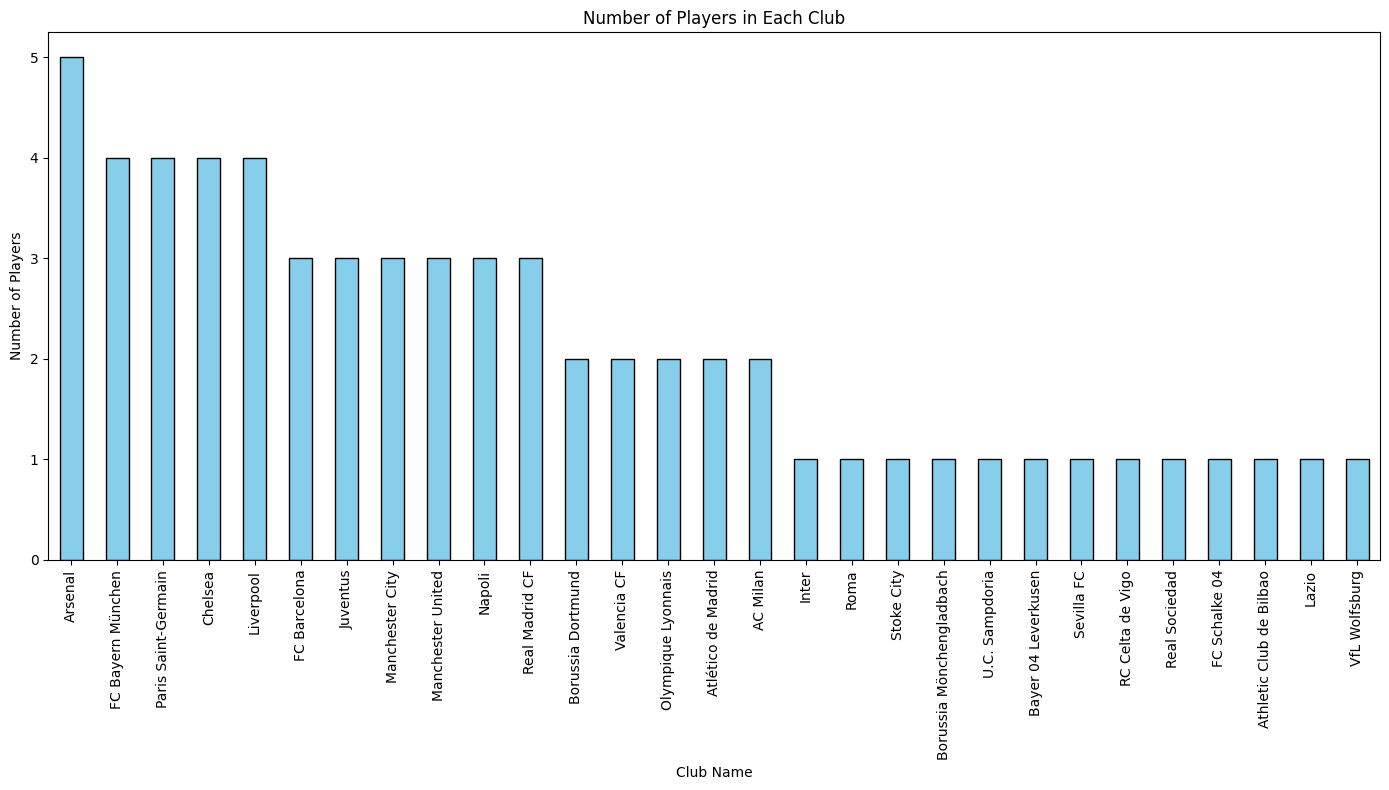

In [13]:
#Checking the distribution of players in the leagues
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'club_name' and number of players in each club
club_counts = best_players['club_name'].value_counts()

# bar chart
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
club_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# labels and title
plt.xlabel('Club Name')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Club')
plt.xticks(rotation=90)

# plot
plt.tight_layout()
plt.show()

### Keeping attributes which are most essential for a forward

In [14]:
from sklearn.preprocessing import MinMaxScaler

# attributes to be included
attributes = [
    'overall', 'potential', 'movement_acceleration', 'movement_sprint_speed', 
    'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'attacking_finishing', 'mentality_penalties'
]

# Normalize the values of the attributes
scaler = MinMaxScaler()
best_players[attributes] = scaler.fit_transform(best_players[attributes])

# Calculate the aggregate score as the mean of the normalized values
best_players['aggregate_score'] = best_players[attributes].mean(axis=1)

C:\Users\SRINI\AppData\Local\Temp\ipykernel_22784\1205483044.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players[attributes] = scaler.fit_transform(best_players[attributes])
C:\Users\SRINI\AppData\Local\Temp\ipykernel_22784\1205483044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players['aggregate_score'] = best_players[attributes].mean(axis=1)


In [15]:
# Sorting by the aggregate score in descending order
top_players = best_players.sort_values(by='aggregate_score', ascending=False)

# top 10 players
top_players[['short_name', 'club_name', 'aggregate_score'] + attributes].head(10)

,short_name,club_name,aggregate_score,overall,potential,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,attacking_finishing,mentality_penalties
1,Cristiano Ronaldo,Real Madrid CF,0.877098,0.923077,0.857143,0.878049,0.931818,0.878049,1.000000,0.388889,1.000000,0.964912,0.842105,0.745763,1.000000,1.000000,0.869565
0,L. Messi,FC Barcelona,0.816089,1.000000,1.000000,0.975610,0.863636,0.926829,1.000000,1.000000,0.730769,0.508772,0.552632,0.406780,0.864865,0.964912,0.630435
2,A. Robben,FC Bayern München,0.765272,0.692308,0.642857,0.902439,0.909091,0.902439,0.941176,0.925926,0.846154,0.385965,0.552632,0.508475,0.918919,0.824561,0.760870
4,L. Suárez,FC Barcelona,0.735124,0.692308,0.642857,0.804878,0.590909,0.780488,0.941176,0.351852,0.884615,0.526316,0.815789,0.694915,0.783784,0.912281,0.869565
17,G. Bale,Real Madrid CF,0.704018,0.461538,0.714286,0.926829,0.977273,0.512195,0.529412,0.444444,0.865385,0.491228,0.894737,0.745763,0.864865,0.754386,0.673913
13,S. Agüero,Manchester City,0.701981,0.461538,0.428571,0.902439,0.772727,0.780488,0.705882,0.907407,0.826923,0.649123,0.368421,0.610169,0.675676,0.912281,0.826087
31,A. Sánchez,Arsenal,0.683710,0.384615,0.500000,0.829268,0.750000,0.902439,0.529412,0.851852,0.769231,0.578947,0.815789,0.491525,0.648649,0.824561,0.695652
24,W. Rooney,Manchester United,0.678028,0.384615,0.357143,0.463415,0.522727,0.560976,0.764706,0.666667,0.884615,0.736842,0.894737,0.847458,0.783784,0.842105,0.782609
22,R. Lewandowski,FC Bayern München,0.676875,0.461538,0.571429,0.585366,0.659091,0.536585,0.764706,0.685185,0.807692,0.771930,0.631579,0.779661,0.648649,0.877193,0.695652
80,A. Lacazette,Olympique Lyonnais,0.674133,0.230769,0.500000,0.804878,0.818182,0.829268,0.529412,0.796296,0.807692,0.684211,0.500000,0.661017,0.594595,0.877193,0.804348


### Picking the Top 10 forwards

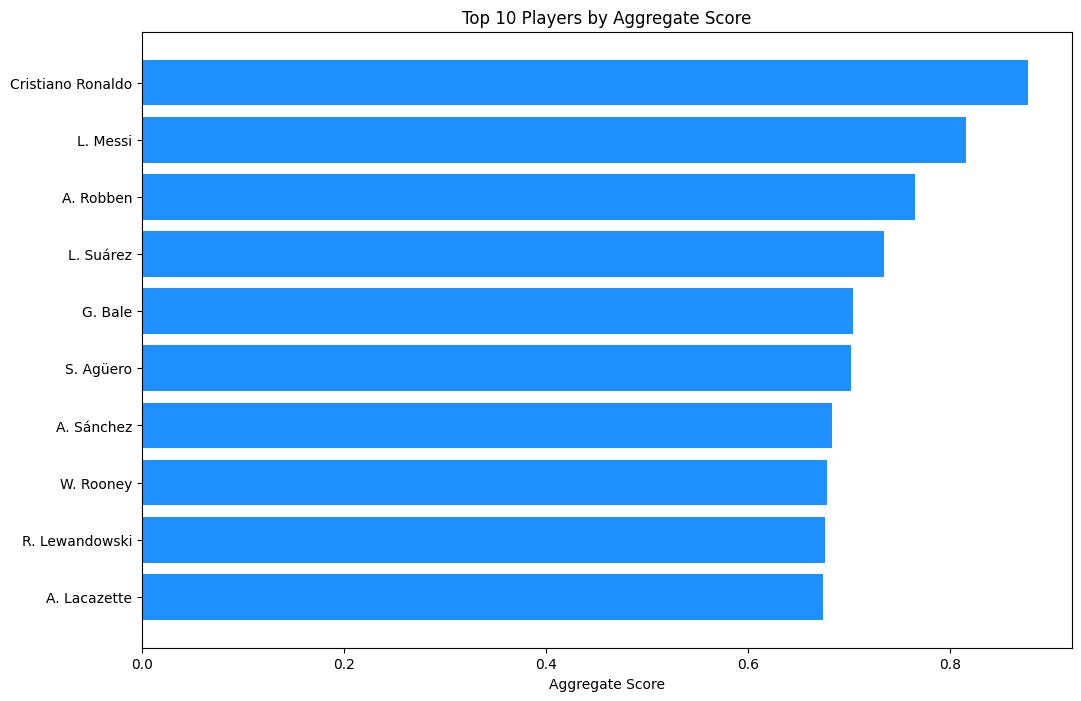

<Figure size 1400x800 with 0 Axes>

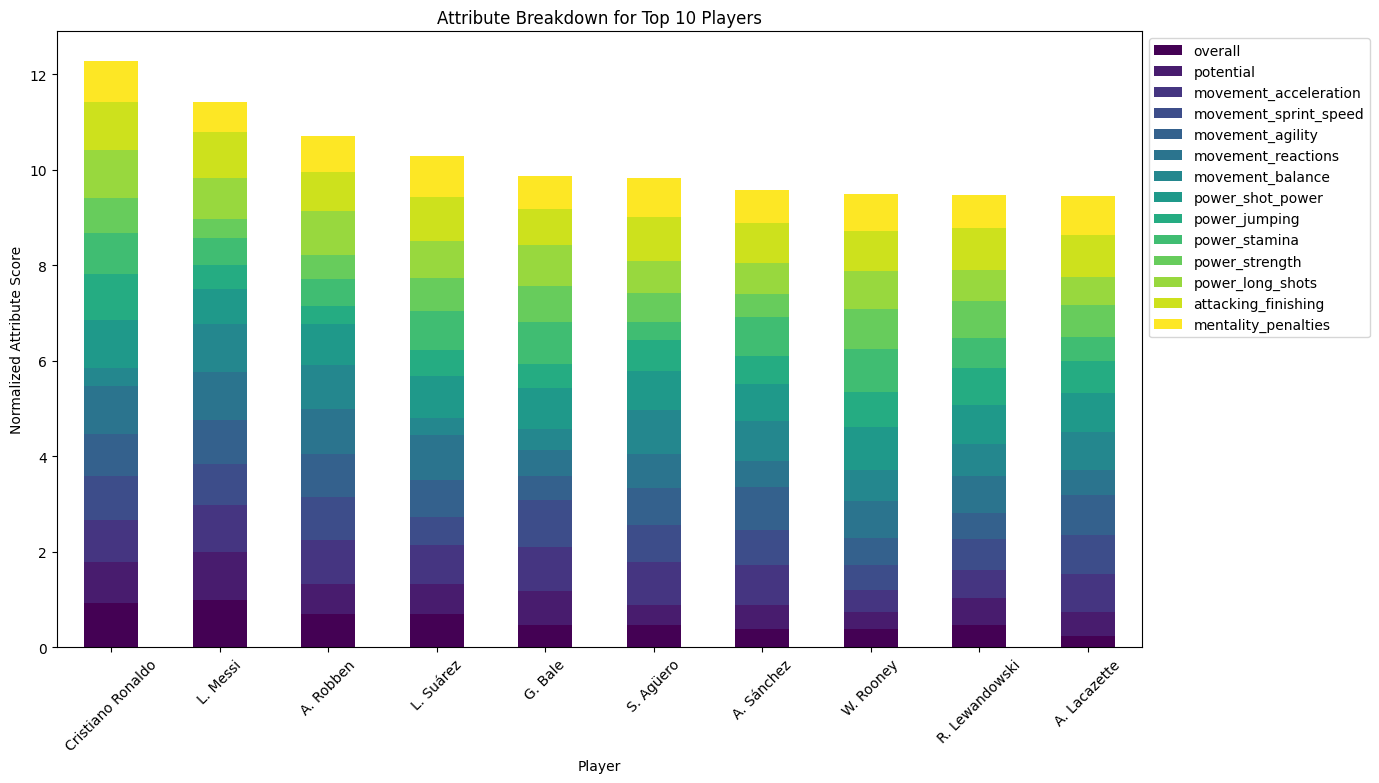

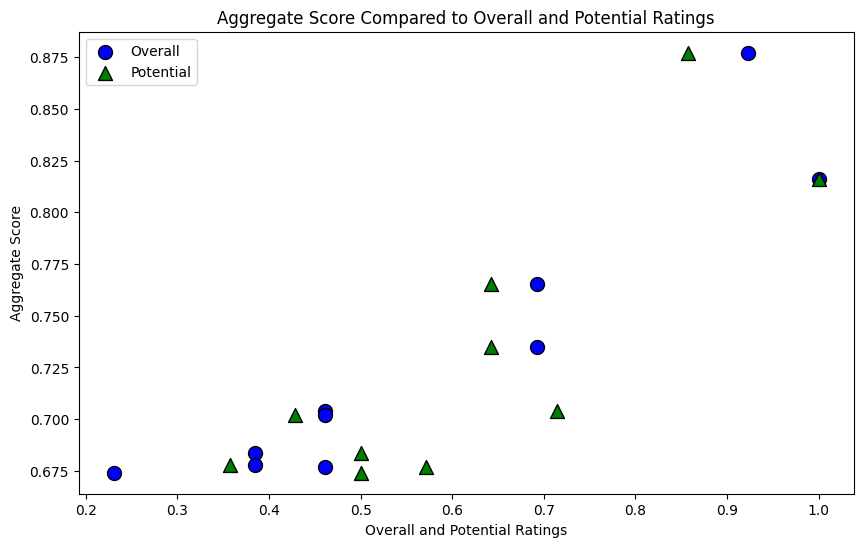

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we are only working with the top players
top_players = best_players.sort_values(by='aggregate_score', ascending=False).head(10)

# Top 10 Players' Aggregate Scores
plt.figure(figsize=(12, 8))
plt.barh(top_players['short_name'], top_players['aggregate_score'], color='dodgerblue')
plt.xlabel("Aggregate Score")
plt.title("Top 10 Players by Aggregate Score")
plt.gca().invert_yaxis()  # Invert y-axis to have the best player on top
plt.show()

# Stacked Bar Chart for Attribute Contributions
plt.figure(figsize=(14, 8))
attributes = [
    'overall', 'potential', 'movement_acceleration', 'movement_sprint_speed', 
    'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'attacking_finishing', 'mentality_penalties'
]
top_players[attributes].plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title("Attribute Breakdown for Top 10 Players")
plt.xlabel("Player")
plt.ylabel("Normalized Attribute Score")
plt.xticks(ticks=range(10), labels=top_players['short_name'], rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Scatter Plot: Aggregate Score vs. Overall and Potential
plt.figure(figsize=(10, 6))
plt.scatter(top_players['overall'], top_players['aggregate_score'], color='blue', s=100, edgecolor='k', label="Overall")
plt.scatter(top_players['potential'], top_players['aggregate_score'], color='green', s=100, marker='^', edgecolor='k', label="Potential")

# Adding labels and title
plt.title("Aggregate Score Compared to Overall and Potential Ratings")
plt.xlabel("Overall and Potential Ratings")
plt.ylabel("Aggregate Score")

# Adding custom legend
plt.legend(loc='best')
plt.show()

### Finding the best forward and best players in each position

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the values of the attributes
scaler = MinMaxScaler()
best_players.loc[:, attributes] = scaler.fit_transform(best_players[attributes])

# Calculate the aggregate score
best_players['aggregate_score'] = best_players[attributes].mean(axis=1)

# Function to find the best player for a given position
def find_best_player(position):
    # Filter players in the specified position
    position_data = best_players[best_players['player_positions'].str.contains(position)].copy()  # Use .copy() to avoid warnings
    
    # Sort by aggregate score
    best_player = position_data.sort_values(by='aggregate_score', ascending=False).head(1)
    
    return best_player[['short_name', 'club_name', 'aggregate_score'] + attributes]

# Best players in each position
best_LW = find_best_player('LW')
best_RW = find_best_player('RW')
best_ST = find_best_player('ST')
best_CF = find_best_player('CF')

# Display the results
print("Best LW:")
print(best_LW)

print("Best RW:")
print(best_RW)

print("Best ST:")
print(best_ST)

print("Best CF:")
print(best_CF)

Best LW:
          short_name       club_name  aggregate_score   overall  potential  \
1  Cristiano Ronaldo  Real Madrid CF         0.877098  0.923077   0.857143   

   movement_acceleration  movement_sprint_speed  movement_agility  \
1               0.878049               0.931818          0.878049   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
1                 1.0          0.388889               1.0       0.964912   

   power_stamina  power_strength  power_long_shots  attacking_finishing  \
1       0.842105        0.745763               1.0                  1.0   

   mentality_penalties  
1             0.869565  
Best RW:
  short_name     club_name  aggregate_score  overall  potential  \
0   L. Messi  FC Barcelona         0.816089      1.0        1.0   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                0.97561               0.863636          0.926829   

   movement_reactions  movement_balance  power_shot_power 

C:\Users\SRINI\AppData\Local\Temp\ipykernel_22784\2208939906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players.loc[:, attributes] = scaler.fit_transform(best_players[attributes])
C:\Users\SRINI\AppData\Local\Temp\ipykernel_22784\2208939906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players['aggregate_score'] = best_players[attributes].mean(axis=1)


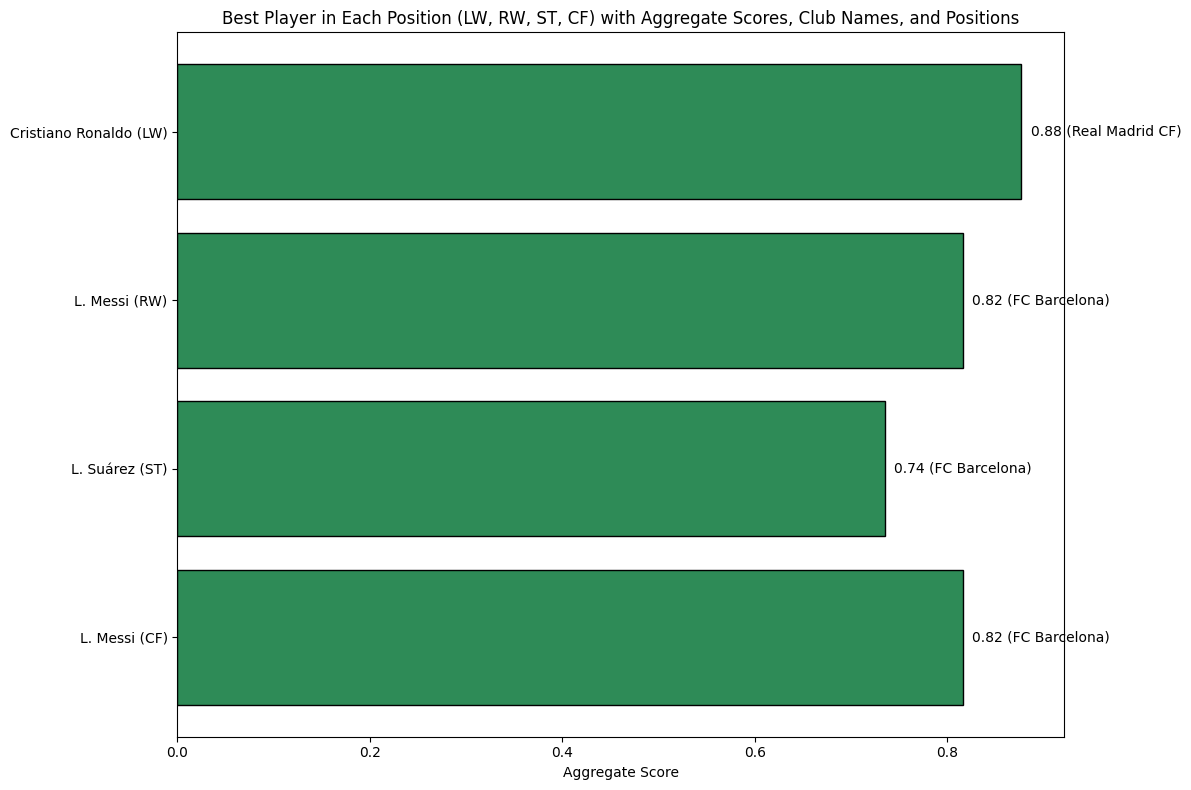

In [18]:
# Plotting the best players in each position
import matplotlib.pyplot as plt

# Positions
positions = ['LW', 'RW', 'ST', 'CF']
best_players = pd.concat([best_LW, best_RW, best_ST, best_CF])
best_players['position'] = positions  # Add a new column to indicate the position

# Plot with labels
plt.figure(figsize=(12, 8))
bars = plt.barh(best_players['short_name'] + ' (' + best_players['position'] + ')', 
                best_players['aggregate_score'], color='seagreen', edgecolor='black')

for bar, score, club in zip(bars, best_players['aggregate_score'], best_players['club_name']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{score:.2f} ({club})', va='center', fontsize=10, color='black')

# Plot labels and title
plt.xlabel("Aggregate Score")
plt.title("Best Player in Each Position (LW, RW, ST, CF) with Aggregate Scores, Club Names, and Positions")
plt.gca().invert_yaxis()  # Top-ranked player appears at the top
plt.tight_layout() 
plt.show()

### Results
1. **Cristiano Ronaldo** is the best forward overall.
2. *L. Messi* is the best RW and CF.
3. *L. Suarez* is the best ST.
4. *Cristiano Ronaldo* is the best LW.

In [19]:
print(best_players.columns)

Index(['short_name', 'club_name', 'aggregate_score', 'overall', 'potential',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'attacking_finishing', 'mentality_penalties', 'position'],
      dtype='object')


### Identifying the best penalty taker in these top forwards

In [20]:
# attributes for penalty-taking
penalty_attributes = ['mentality_penalties', 'power_shot_power', 'attacking_finishing']
for attr in penalty_attributes:
    if attr not in data.columns:
        raise ValueError(f"Attribute '{attr}' not found in the dataset")

# Normalize the attributes to create a penalty-taking score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
best_players[penalty_attributes] = scaler.fit_transform(best_players[penalty_attributes])

# Calculate a weighted penalty-taking score
best_players['penalty_score'] = (0.5 * best_players['mentality_penalties'] + 
                         0.3 * best_players['power_shot_power'] + 
                         0.2 * best_players['attacking_finishing'])

# highest penalty score
best_penalty_taker = best_players.sort_values(by='penalty_score', ascending=False).head(3)

# best penalty taker with relevant details
print("Best Penalty Takers:")
print(best_penalty_taker[['short_name', 'position', 'club_name', 'penalty_score']])

Best Penalty Takers:
          short_name position       club_name  penalty_score
1  Cristiano Ronaldo       LW  Real Madrid CF       1.000000
4          L. Suárez       ST    FC Barcelona       0.671429
0           L. Messi       RW    FC Barcelona       0.120000


**Cristiano Ronaldo** is the best Penalty taker according to this 2016 data.